<center>
   <h1> House Price Prediction </h1>
 </center>

We have data of sales of house in some area. For each house we have complete information about its Size, Price, Number of Bedrooms, Number of Bathrooms, whether it is made of bricks, Neighbourhood.
Objective of this case study is to check which factors are effecting house price. 

Approach to reach the objective:

 Exploratory data analysis to identify the initial patterns in this data i.e. identification of outliers, missing values, univariate, and bivariate patterns.

 Check multicollinearity among independent variables.

 Use OLS Regression to see price predictors.

 Does performance check on testing dataset and using K-fold Cross Validation for Bias Variance Trade-off.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']= 12,8
plt.rcParams['axes.grid']=True
plt.rcParams['patch.force_edgecolor']=True
%matplotlib inline

In [2]:
#loading the dataset
house = pd.read_csv('House_Prices.csv')
house

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
5,6,114600,1780,3,2,2,No,North
6,7,151600,1830,3,3,3,Yes,West
7,8,150700,2160,4,2,2,No,West
8,9,119200,2110,4,2,3,No,East
9,10,104000,1730,3,3,3,No,East


In [3]:
#setting limit for pandas to show all rows and columns
pd.set_option('max_rows',None)
pd.set_option('max_columns',None)

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
Home            128 non-null int64
Price           128 non-null int64
SqFt            128 non-null int64
Bedrooms        128 non-null int64
Bathrooms       128 non-null int64
Offers          128 non-null int64
Brick           128 non-null object
Neighborhood    128 non-null object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


## Creating Dummy Variables

In [5]:
house = pd.get_dummies(house, drop_first=True)

In [6]:
house.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,1,114300,1790,2,2,2,0,0,0
1,2,114200,2030,4,2,3,0,0,0
2,3,114800,1740,3,2,1,0,0,0
3,4,94700,1980,3,2,3,0,0,0
4,5,119800,2130,3,3,3,0,0,0


In [7]:
house = house.drop(['Home'],axis=1)

In [8]:
house.columns

Index(['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick_Yes',
       'Neighborhood_North', 'Neighborhood_West'],
      dtype='object')

In [9]:
house.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,114300,1790,2,2,2,0,0,0
1,114200,2030,4,2,3,0,0,0
2,114800,1740,3,2,1,0,0,0
3,94700,1980,3,2,3,0,0,0
4,119800,2130,3,3,3,0,0,0


# Exploratory Data Analysis

In [10]:
def var_sum(x):
    iqr = x.dropna().quantile(0.75) - x.dropna().quantile(0.025)
    
    return pd.Series([(x.isnull().sum()/len(x))*100, x.dtype, len(x.unique()), len(x), x.count(), x.isnull().sum(), x.dropna().mean(), x.dropna().median(), x.dropna().std(), x.dropna().min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05), x.dropna().quantile(0.10), x.dropna().quantile(0.25), x.dropna().quantile(0.50), x.dropna().quantile(0.75), x.dropna().quantile(0.90), x.dropna().quantile(0.95), x.dropna().quantile(0.99), x.dropna().max(), iqr, (x.max() > x.dropna().quantile(0.75)+1.5*iqr) | (x.min() < (x.dropna().quantile(0.25)-(1.5*iqr))) ], 
                      index=['Nmiss%', 'Dtype', 'Unique', 'Length', 'Count', 'Nmiss', 'Mean', 'Median', 'Std', 'Min', 'P1', 'P5', 'P10', 'P25', 'P50', 'P75', 'P90', 'P95', 'P99', 'Max', 'IQR', 'Outlier'])

In [11]:
house.apply(lambda x: var_sum(x)).T

,Nmiss%,Dtype,Unique,Length,Count,Nmiss,Mean,Median,Std,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max,IQR,Outlier
Price,0,int64,123,128,128,0,130427,125950,26868.8,69100,81570,91310,102020,111325,125950,148250,166560,179465,196476,211200,63477.5,False
SqFt,0,int64,61,128,128,0,2000.94,2000,211.572,1450,1530.8,1664,1720,1880,2000,2140,2250,2368,2505.7,2590,538.25,False
Bedrooms,0,int64,4,128,128,0,3.02344,3,0.725951,2,2,2,2,3,3,3,4,4,4.73,5,1,True
Bathrooms,0,int64,3,128,128,0,2.44531,2,0.514492,2,2,2,2,2,2,3,3,3,3,4,1,False
Offers,0,int64,6,128,128,0,2.57812,3,1.06932,1,1,1,1,2,3,3,4,4,5,6,2,False
Brick_Yes,0,uint8,2,128,128,0,0.328125,0,0.471376,0,0,0,0,0,0,1,1,1,1,1,1,False
Neighborhood_North,0,uint8,2,128,128,0,0.34375,0,0.476825,0,0,0,0,0,0,1,1,1,1,1,1,False
Neighborhood_West,0,uint8,2,128,128,0,0.304688,0,0.462084,0,0,0,0,0,0,1,1,1,1,1,1,False


In [12]:
#using pandas profile reporter for getting basic stats of variables
import pandas_profiling
pandas_profiling.ProfileReport(house)

C:\Users\Hp\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use(BACKEND)


Number of variables,8
Number of observations,128
Total Missing (%),0.0%
Total size in memory,5.5 KiB
Average record size in memory,43.6 B
Numeric,5
Categorical,0
Boolean,3
Date,0
Text (Unique),0
Rejected,0


## Visualizing Missing Values

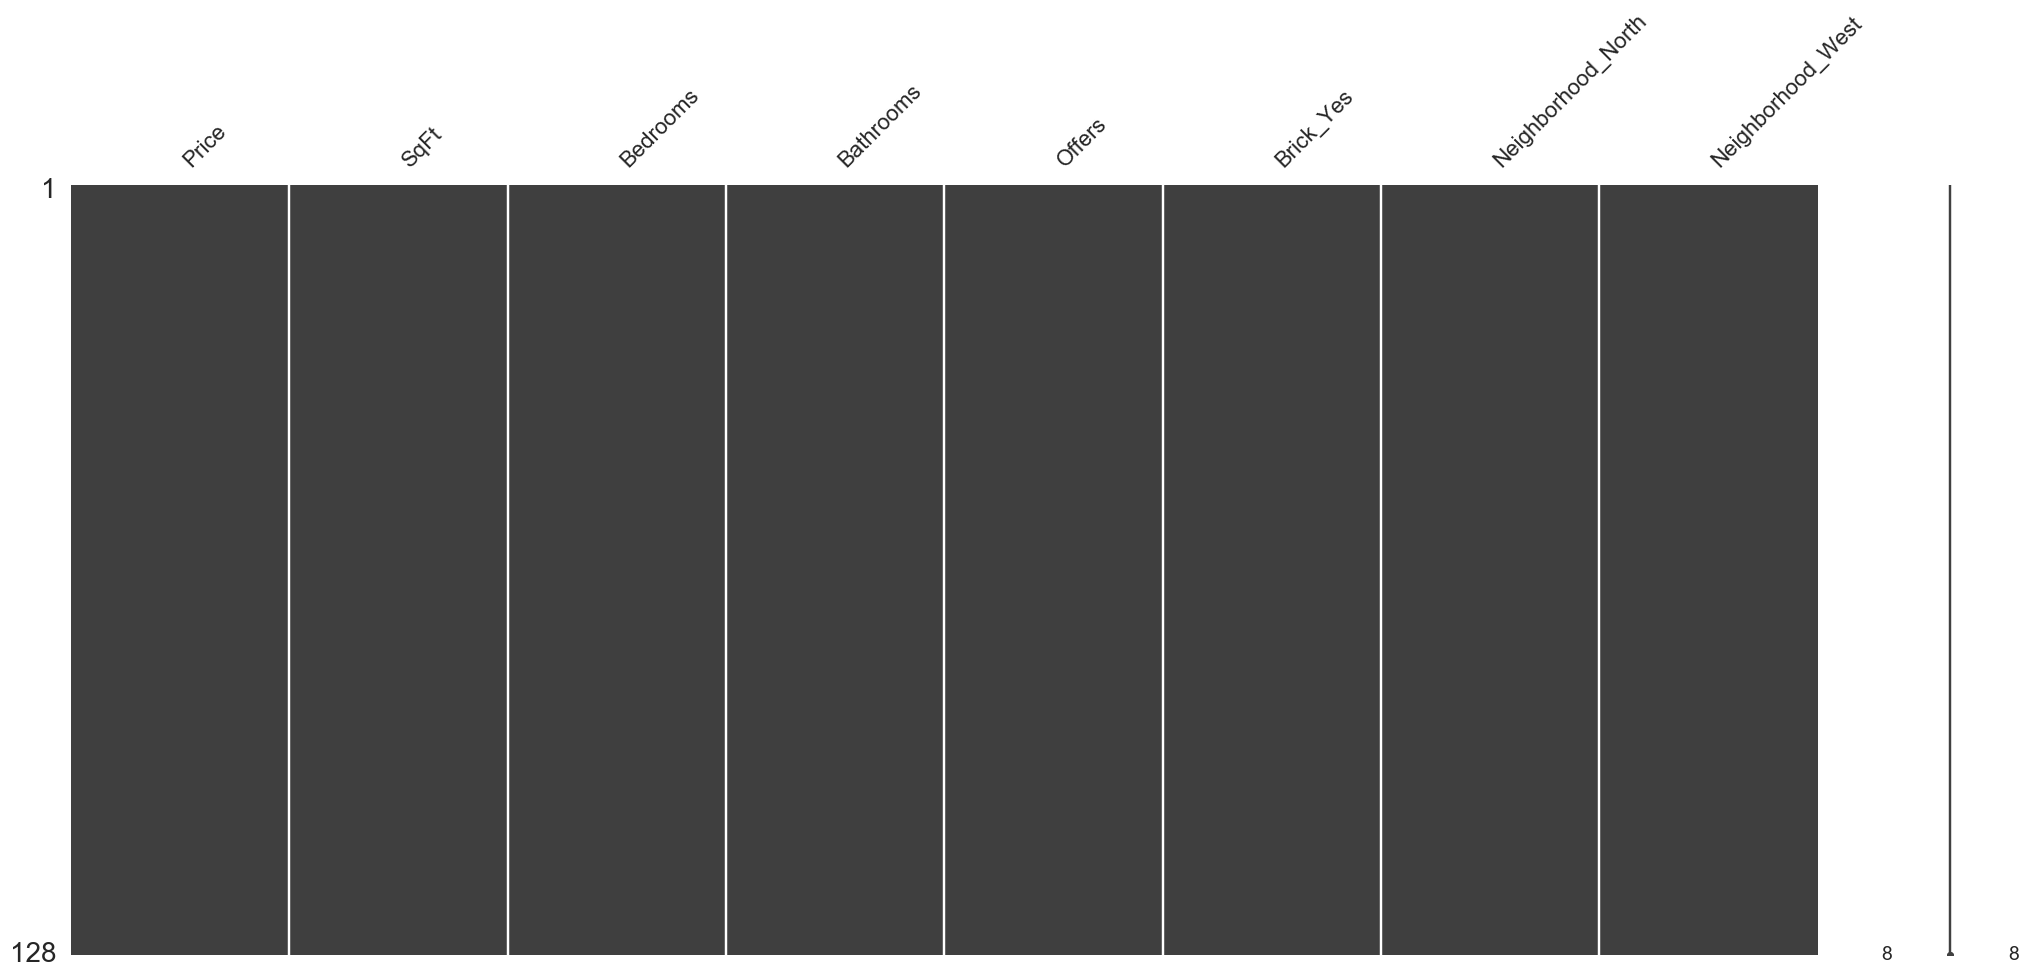

In [13]:
import missingno as mnso
mnso.matrix(house)

## Exploring Dependent Variable

C:\Users\Hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


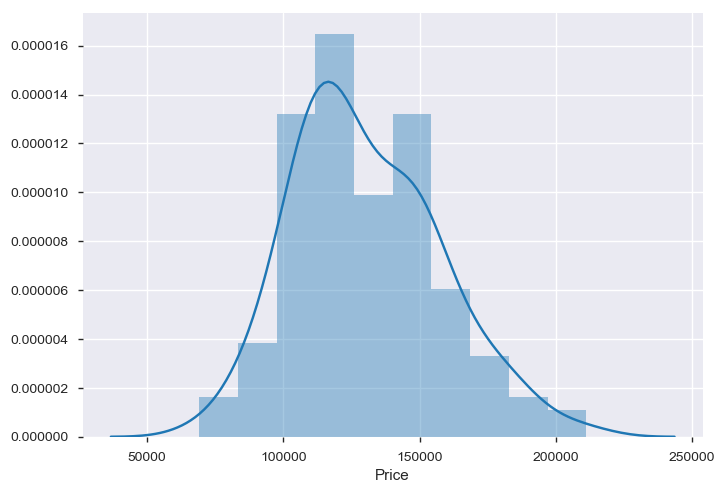

In [14]:
#no issue as dependent variable is normal
sns.distplot(house['Price'])

## Multivariate Analysis

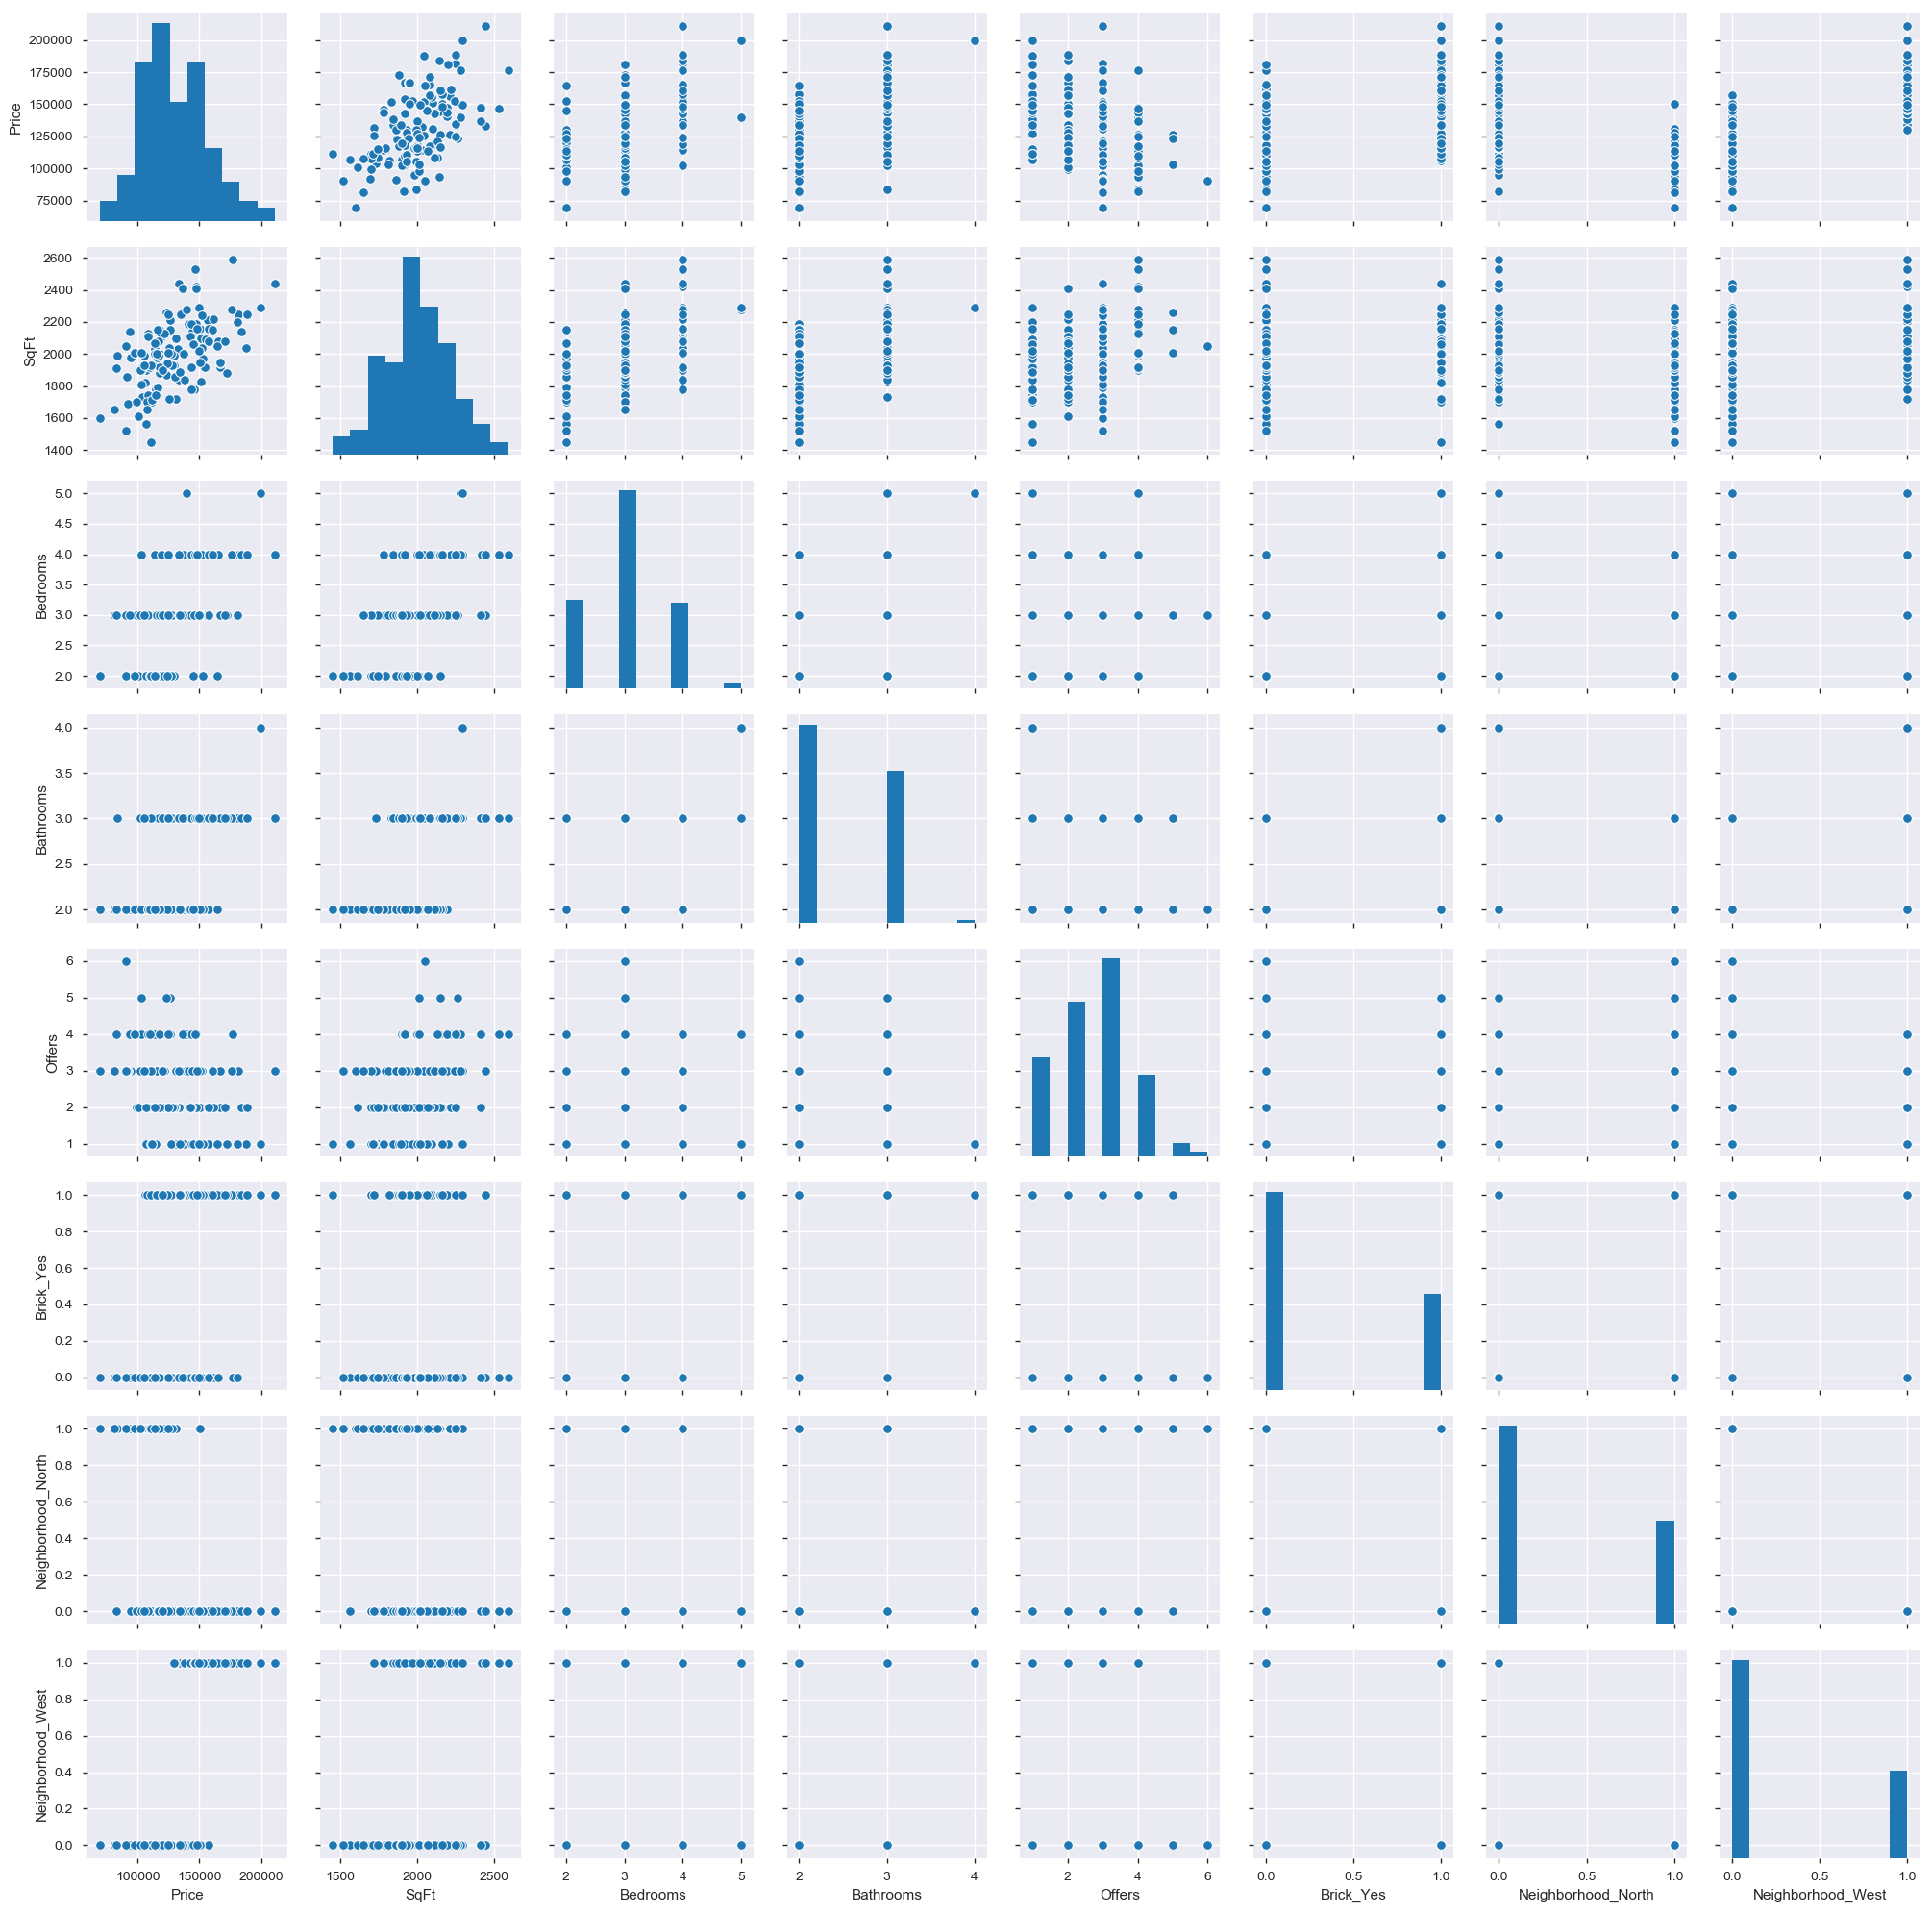

In [15]:
sns.pairplot(house)

## Visualizing Corelations of Variables

In [16]:
house.corr()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
Price,1.000000,0.552982,0.525926,0.523258,-0.313636,0.452817,-0.548221,0.714007
SqFt,0.552982,1.000000,0.483807,0.522745,0.336923,0.079792,-0.288886,0.250759
Bedrooms,0.525926,0.483807,1.000000,0.414556,0.114271,0.046380,-0.364667,0.471477
Bathrooms,0.523258,0.522745,0.414556,1.000000,0.143793,0.171977,-0.275830,0.285923
Offers,-0.313636,0.336923,0.114271,0.143793,1.000000,-0.144986,0.332987,-0.327425
Brick_Yes,0.452817,0.079792,0.046380,0.171977,-0.144986,1.000000,-0.260554,0.115793
Neighborhood_North,-0.548221,-0.288886,-0.364667,-0.275830,0.332987,-0.260554,1.000000,-0.479098
Neighborhood_West,0.714007,0.250759,0.471477,0.285923,-0.327425,0.115793,-0.479098,1.000000


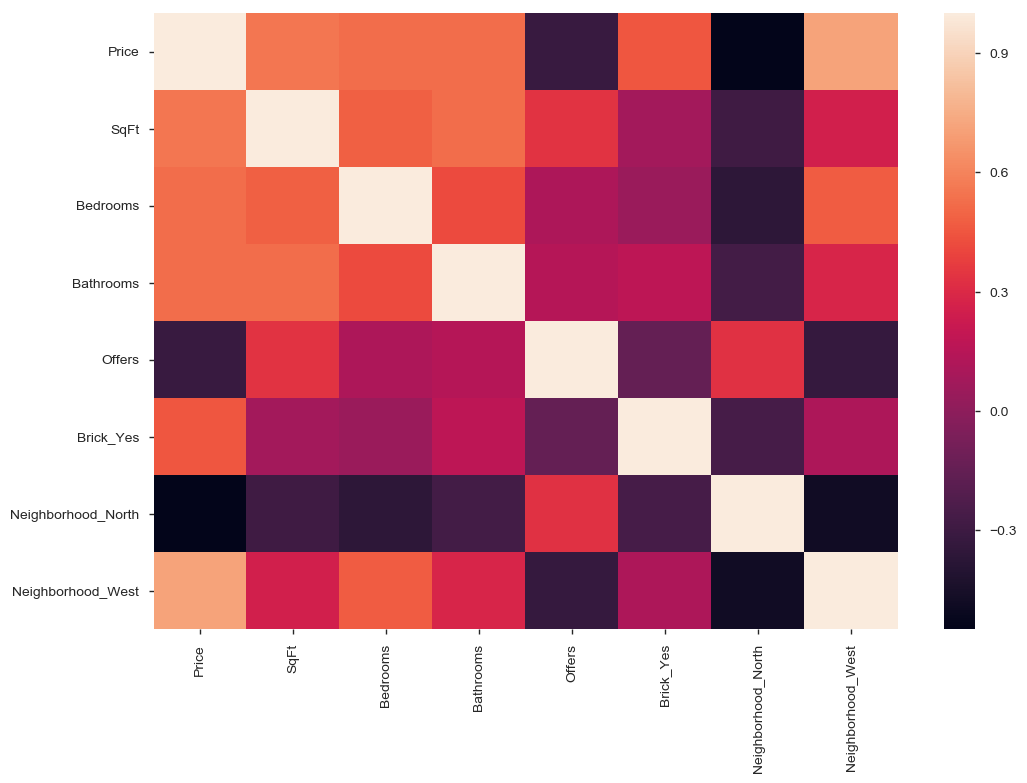

In [17]:
plt.figure(figsize= (12,8))
sns.heatmap(house.corr())

In [18]:
all_cols= '+'.join(house.columns.difference(['Price']))
myformula= 'Price~' + all_cols
myformula

'Price~Bathrooms+Bedrooms+Brick_Yes+Neighborhood_North+Neighborhood_West+Offers+SqFt'

In [19]:
import statsmodels.formula.api as smf
lm = smf.ols(myformula, house).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     113.3
Date:                Fri, 18 Jan 2019   Prob (F-statistic):           8.25e-50
Time:                        18:40:50   Log-Likelihood:                -1356.7
No. Observations:                 128   AIC:                             2729.
Df Residuals:                     120   BIC:                             2752.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            598.9191   9552.197      0.063      0.950   -1.83e+04    1.95e+04
Bathrooms           7883.2785   2117.035      3.724      0.000    3691.696    1.21e+04
Bedrooms            4246.7939   1597.911      2.658      0.009    1083.042    7410.546
Brick_Yes            1.73e+04   1981.616      8.729      0.000    1.34e+04    2.12e+04
Neighborhood_North  1560.5791   2396.765      0.651      0.516   -3184.850    6306.008
Neighborhood_West   2.224e+04   2531.758      8.785      0.000    1.72e+04    2.73e+04
Offers             -8267.4883   1084.777     -7.621      0.000   -1.04e+04   -6119.706
SqFt                  52.9937      5.734      9.242      0.000      41.640      64.347
==============================================================================
Omnibus:                        3.026   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                2.483
Skew:                           0.268   Prob(JB):                        0.289
Kurtosis:                       3.421   Cond. No.                     2.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\Hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


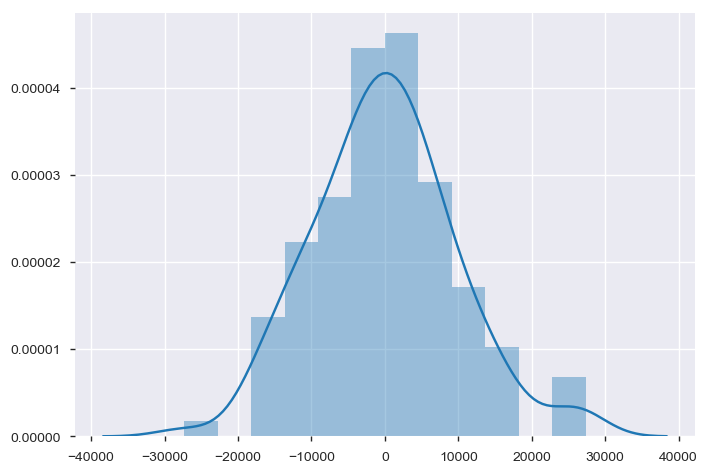

In [20]:
#ensuring that residuals are normal
sns.distplot(lm.resid)

## Variable Reduction Using Variance Inflation Factor

In [21]:
from statsmodels.stats.outliers_influence  import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(myformula, house, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['Features']= x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,Features
0,116.351673,Intercept
7,1.862215,SqFt
5,1.731590,Neighborhood_West
2,1.702472,Bedrooms
6,1.702392,Offers
4,1.652453,Neighborhood_North
1,1.500976,Bathrooms
3,1.103908,Brick_Yes


In [22]:
house= house.drop(['Neighborhood_North'],axis=1)
all_cols= '+'.join(house.columns.difference(['Price']))
myformula= 'Price~' + all_cols
myformula

'Price~Bathrooms+Bedrooms+Brick_Yes+Neighborhood_West+Offers+SqFt'

In [23]:
lm = smf.ols(myformula, house).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     132.8
Date:                Fri, 18 Jan 2019   Prob (F-statistic):           8.44e-51
Time:                        18:40:51   Log-Likelihood:                -1356.9
No. Observations:                 128   AIC:                             2728.
Df Residuals:                     121   BIC:                             2748.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3067.4708   8746.712      0.351      0.726   -1.42e+04    2.04e+04
Bathrooms          7810.6983   2109.060      3.703      0.000    3635.257     1.2e+04
Bedrooms           4070.0049   1570.921      2.591      0.011     959.952    7180.058
Brick_Yes          1.706e+04   1942.805      8.780      0.000    1.32e+04    2.09e+04
Neighborhood_West  2.194e+04   2482.393      8.837      0.000     1.7e+04    2.69e+04
Offers            -8019.0028   1013.011     -7.916      0.000      -1e+04   -6013.480
SqFt                 52.1492      5.572      9.359      0.000      41.117      63.181
==============================================================================
Omnibus:                        2.787   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.248   Jarque-Bera (JB):                2.238
Skew:                           0.270   Prob(JB):                        0.327
Kurtosis:                       3.357   Cond. No.                     2.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Splitting the dataset into train and test

In [24]:
from sklearn.model_selection import train_test_split as tts
train_x, test_x, train_y, test_y = tts(house.iloc[:,1:], house['Price'], test_size=0.2, random_state=110)

In [25]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(102, 6)
(102,)
(26, 6)
(26,)


In [26]:
from sklearn.feature_selection import f_regression

f_values, p_values= f_regression(train_x,train_y)

In [27]:
#interpreting variables according to their p_values
p= list(p_values.round(4))

pval_df= pd.DataFrame()
pval_df['F_values']=f_values
pval_df['P_values']=p
pval_df['Features']=train_x.columns
pval_df.sort_values(by='P_values', ascending=False)

,F_values,P_values,Features
3,9.099178,0.0032,Offers
0,38.047058,0.0000,SqFt
1,41.090795,0.0000,Bedrooms
2,43.355043,0.0000,Bathrooms
4,23.082658,0.0000,Brick_Yes
5,92.026188,0.0000,Neighborhood_West


# Building the final model and making predictions

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

reg= LinearRegression()
reg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Calculating Score matrices

low variance in the scores of training and testing model signifies that there is no underfitting or overfitting 

In [29]:
y_pred_t= reg.predict(train_x)
mse= metrics.mean_squared_error(train_y,y_pred_t)
rmse= np.sqrt(mse)
r2= metrics.r2_score(train_y,y_pred_t)

print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)

MSE: 87257288.61851418
RMSE: 9341.160988791178
R2 Score: 0.8568092157990715


In [30]:
y_pred= reg.predict(test_x)
mse= metrics.mean_squared_error(test_y,y_pred)
rmse= np.sqrt(mse)
r2= metrics.r2_score(test_y,y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('R2 score:', r2)

MSE: 132042420.56984061
RMSE: 11490.971263119607
R2 score: 0.8731371277695689


## Interpreting Estimators and their coefficients

In [31]:
cf= list(reg.coef_.round(3))

cof_df= pd.DataFrame()
cof_df['Coefficients']= cf
cof_df['Features']= train_x.columns
cof_df.loc[-1]= [reg.intercept_, 'Intercept']
cof_df.index= cof_df.index + 1
cof_df= cof_df.sort_index()
cof_df

,Coefficients,Features
0,9920.461474,Intercept
1,46.645000,SqFt
2,4538.719000,Bedrooms
3,7774.034000,Bathrooms
4,-6853.966000,Offers
5,16884.096000,Brick_Yes
6,21743.307000,Neighborhood_West


In [32]:
resid= train_y - y_pred_t

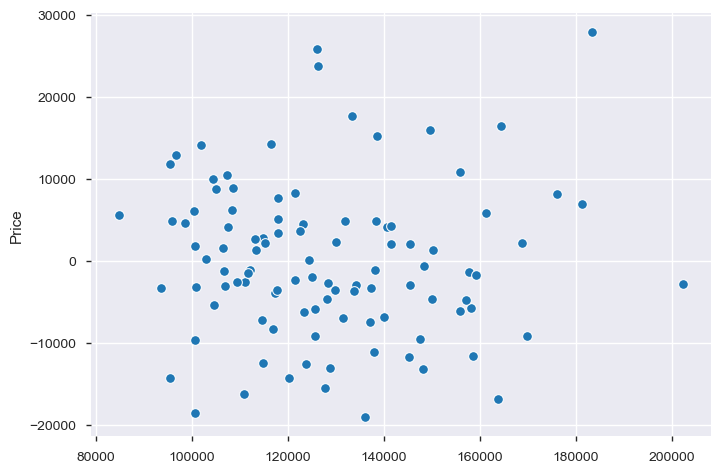

In [33]:
#this should be a randomly scattered plot that ensures heteroscedacity
sns.scatterplot(y_pred_t, resid)

In [34]:
list(zip(test_y , y_pred))

[(188000, 178326.71773571975),
 (161300, 162984.75907868234),
 (157100, 130172.43063284576),
 (114900, 102000.37054726983),
 (69100, 88616.10191536059),
 (83600, 112266.44707914801),
 (176500, 175813.5906259159),
 (119700, 131806.45749361097),
 (155400, 156000.8379928681),
 (120500, 117704.05831229826),
 (149300, 137652.63783633523),
 (91700, 97352.87267375195),
 (150700, 152412.02346161858),
 (102700, 104833.07987724143),
 (172500, 166324.79561044177),
 (105600, 116321.71180566699),
 (139600, 151755.03701764793),
 (93600, 111489.165562744),
 (143100, 141217.21877515025),
 (147100, 138479.5472582908),
 (164800, 161941.69548361102),
 (176800, 166535.48450738227),
 (144200, 147860.47261742444),
 (140900, 137559.47871098015),
 (166500, 162269.53088392277),
 (182000, 174414.2400401074)]

In [35]:
pred= pd.DataFrame()
pred['Actual']=test_y
pred['Predicted']=y_pred
pred.head()

,Actual,Predicted
29,188000,178326.717736
62,161300,162984.759079
93,157100,130172.430633
111,114900,102000.370547
28,69100,88616.101915


## Plotting Actual and Predicted values

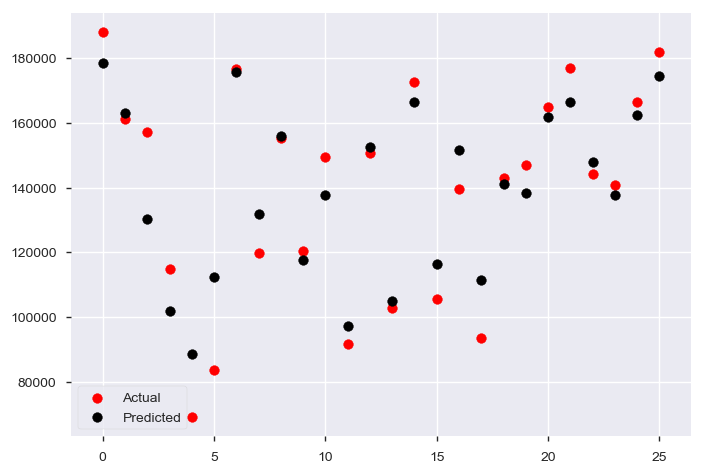

In [37]:
plt.scatter(range(0, len(pred['Actual'])), pred['Actual'], c='red', label='Actual')
plt.scatter(range(0, len(pred['Predicted'])), pred['Predicted'], c='black', label='Predicted')
plt.legend(frameon=True)

# Compairing our final model with other models using K-fold

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [56]:
sc1= cross_val_score(Ridge(), train_x, train_y, scoring='r2', cv=3)
sc1.mean()


0.8286206184284417

In [57]:
sc2= cross_val_score(Lasso(), train_x, train_y, scoring='r2', cv=3)
sc2.mean()


0.8291821206444997

In [58]:
sc3= cross_val_score(ElasticNet(), train_x, train_y, scoring='r2', cv=3)
sc3.mean()


0.685177487643811

In [59]:
sc4= cross_val_score(LinearRegression(), train_x, train_y, scoring='r2', cv=3)
sc4.mean()


0.8291863528841148

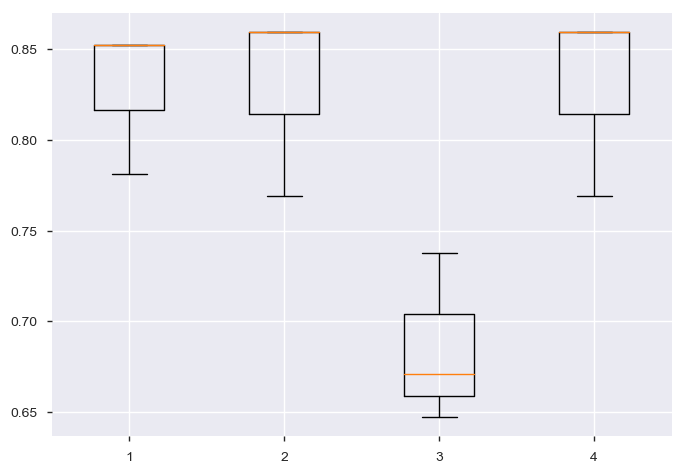

In [61]:
results=[]
results.append(sc1)
results.append(sc2)
results.append(sc3)
results.append(sc4)

plt.boxplot(results)
plt.show()